In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --q wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.7 MB/s eta 0:00:00


In [4]:
# Import necessary libraries and modules for data analysis, visualization, and modeling.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import 'wfdb' library for working with physiological signal data.
import wfdb

# Import 'scipy.signal' module for signal processing.
from scipy import signal

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [5]:
path = "physionet.org/files/ptbdb/1.0.0/"
files = os.listdir(path)

In [6]:
data = []
for item in files:
    full_path = os.path.join(path, item)
    if os.path.isdir(full_path):
        data.append(item)

In [7]:
def remove_baseline_noise(ecg_signal, sr=1000, freq=0.5):
    nyquist_freq = 0.5 * sr
    low_cutoff = freq / nyquist_freq
    b, a = signal.butter(1, low_cutoff, btype='high')
    baseline_removed_signal = signal.filtfilt(b, a, ecg_signal, axis=0)

    high_cutoff = 40.0 / nyquist_freq
    b, a = signal.butter(1, high_cutoff, btype='low')
    noise_removed_signal = signal.filtfilt(b, a, baseline_removed_signal, axis=0)

    return noise_removed_signal

def filter_ecg_signal(ecg_signal, sr=1000, freq=40.0):
    nyquist_freq = 0.5 * sr
    high_cutoff = freq / nyquist_freq
    b, a = signal.butter(1, high_cutoff, btype='low')
    filtered_signal = signal.filtfilt(b, a, ecg_signal, axis=0)
    return filtered_signal


In [8]:
ecg_signals=[]
diagnosis=[]
max_rec=[]
min_shape=10000000000
for folder in data:
    patient_path = os.path.join(path, folder)
    file_list = os.listdir(patient_path)

    # Filter for .dat files
    dat_files = [file for file in file_list if file.endswith(".dat")]

    # Print the names of .dat files
    for dat_file in dat_files:
        record_path= os.path.join(patient_path,dat_file)
        record = wfdb.rdrecord(record_path[:-4], channels=list(range(15)))
        fs = record.fs  # Sampling frequency
        signal_names = record.sig_name  # List of signal names
        ecg_signal = record.p_signal  # ECG signal data
        processed_signal = remove_baseline_noise(ecg_signal)
        processed_signal = filter_ecg_signal(processed_signal)
        ecg_signals.append(processed_signal)
        if ecg_signal.shape[0]<min_shape:
            min_shape = ecg_signal.shape[0]
        with open(record_path[:-4]+'.hea', 'r') as file:
            lines = file.readlines()
        diagnosis_section_start = lines.index('# Diagnose:\n') + 1
        diagnosis_section_end = lines.index('# Hemodynamics:\n')

        reason_for_diagnosis = ''
        for line in lines[diagnosis_section_start:diagnosis_section_end]:
            if line.startswith('# Reason for admission:'):
                reason_for_diagnosis = line.strip().split(': ')[1]
                break
        diagnosis.append(reason_for_diagnosis)


In [9]:
selected_signal_names= [0, 3, 5]
selected_signal_names

[0, 3, 5]

In [10]:
ecg_signals_reshaped=[]
for ar in ecg_signals:
    ecg_signals_reshaped.append(ar[:min_shape])
ecg_signals_reshaped=np.array(ecg_signals_reshaped)

In [11]:
disease_class = ['Myocardial infarction', 'Valvular heart disease', 'Dysrhythmia',
                 'Heart failure (NYHA 2)', 'Heart failure (NYHA 3)', 'Heart failure (NYHA 4)',
                 'Palpitation', 'Cardiomyopathy', 'Stable angina', 'Hypertrophy',
                 'Bundle branch block', 'Unstable angina', 'Myocarditis']

In [12]:
healthy_control_class = ['Healthy control', 'n/a']

# Create a new list to represent the two classes
new_diagnosis = []

for d in diagnosis:
    if d in disease_class:
        new_diagnosis.append(1)
    elif d in healthy_control_class:
        new_diagnosis.append(0)

print(new_diagnosis)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 

In [13]:
y=np.array(new_diagnosis)

In [14]:
X = ecg_signals_reshaped

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Print the shape of each variable
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (411, 32000, 15)
Shape of X_test: (138, 32000, 15)
Shape of y_train: (411,)
Shape of y_test: (138,)


In [17]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
print("Class Weights:", class_weights)

Class Weights: [2.70394737 0.61343284]


# LSTM

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [19]:
class_weights = {0: 2.55232558, 1: 0.62181303}

In [20]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(32000, 15))))
model.add(Dense(1,activation='sigmoid'))
adam = Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=adam, metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, class_weight=class_weights)

Epoch 1/10
12/12 [==============================] - 33s 2s/step - loss: 0.6750 - accuracy: 0.3930 - val_loss: 0.6927 - val_accuracy: 0.4524
Epoch 2/10
12/12 [==============================] - 22s 2s/step - loss: 0.6732 - accuracy: 0.4607 - val_loss: 0.6898 - val_accuracy: 0.5238
Epoch 3/10
12/12 [==============================] - 22s 2s/step - loss: 0.6716 - accuracy: 0.5176 - val_loss: 0.6871 - val_accuracy: 0.5476
Epoch 4/10
12/12 [==============================] - 22s 2s/step - loss: 0.6705 - accuracy: 0.5583 - val_loss: 0.6843 - val_accuracy: 0.5714
Epoch 5/10
12/12 [==============================] - 22s 2s/step - loss: 0.6687 - accuracy: 0.5935 - val_loss: 0.6810 - val_accuracy: 0.6429
Epoch 6/10
12/12 [==============================] - 22s 2s/step - loss: 0.6675 - accuracy: 0.6179 - val_loss: 0.6786 - val_accuracy: 0.6190
Epoch 7/10
12/12 [==============================] - 22s 2s/step - loss: 0.6663 - accuracy: 0.6450 - val_loss: 0.6757 - val_accuracy: 0.6190
Epoch 8/10
12/12 [==

In [22]:
y_pred=model.predict(X_test)

5/5 [==============================] - 5s 780ms/step


In [23]:
y_pred=np.round(y_pred,0)

In [24]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[ 7 24]
 [26 81]]


In [25]:
model.evaluate(X_test,y_test)


5/5 [==============================] - 4s 778ms/step - loss: 0.6669 - accuracy: 0.6377


[0.666945219039917, 0.6376811861991882]

In [26]:
# Get the accuracy and loss values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

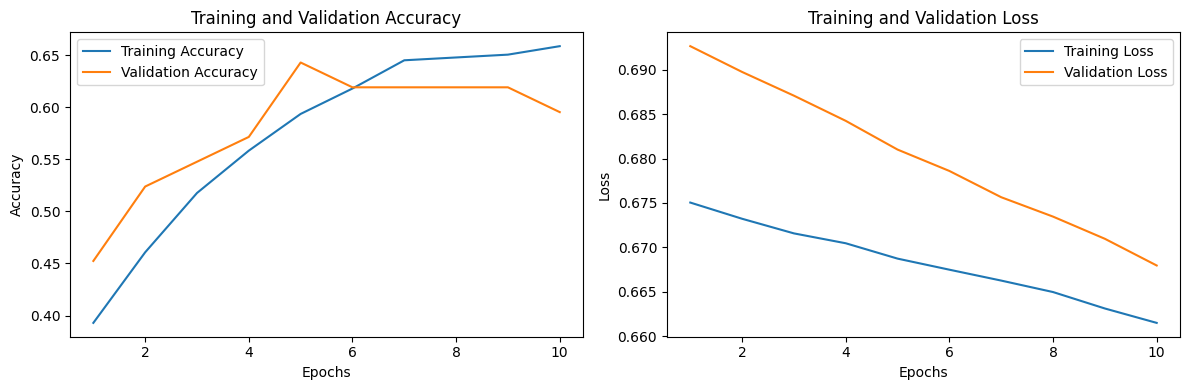

In [27]:
# Create the plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 11), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_loss, label='Training Loss')
plt.plot(range(1, 11), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [29]:
lstm_accuracy = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred)
lstm_recall = recall_score(y_test, y_pred)
lstm_f1 = f1_score(y_test, y_pred)

In [30]:
print("LSTM model - Accuracy:", lstm_accuracy, " Precision:", lstm_precision,
      " Recall:", lstm_recall, " F1-Score:", lstm_f1)

LSTM model - Accuracy: 0.6376811594202898  Precision: 0.7714285714285715  Recall: 0.7570093457943925  F1-Score: 0.7641509433962264


In [31]:
# Take a subset of 300 samples for training
X_train_subset = X_train[:300]
y_train_subset = y_train[:300]

# Take a subset of 100 samples for testing
X_test_subset = X_test[:100]
y_test_subset = y_test[:100]

# Print the shape of each subset
print("Shape of X_train_subset:", X_train_subset.shape)
print("Shape of X_test_subset:", X_test_subset.shape)
print("Shape of y_train_subset:", y_train_subset.shape)
print("Shape of y_test_subset:", y_test_subset.shape)

Shape of X_train_subset: (300, 32000, 15)
Shape of X_test_subset: (100, 32000, 15)
Shape of y_train_subset: (300,)
Shape of y_test_subset: (100,)


In [32]:
X_train_flatten = X_train_subset.reshape((X_train_subset.shape[0], -1))
X_test_flatten = X_test_subset.reshape((X_test_subset.shape[0], -1))


# CNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create a new model
mod_network = Sequential()
mod_network.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(32000, 15)))
mod_network.add(MaxPooling1D(pool_size=2))
mod_network.add(Flatten())
mod_network.add(Dense(128, activation='relu'))
mod_network.add(Dropout(0.5))
mod_network.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(learning_rate=0.0001)
mod_network.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [34]:
# Train the model
cnn_history = mod_network.fit(X_train_subset, y_train_subset, epochs=10, validation_split=0.1,
                            class_weight=class_weights)

Epoch 1/10
9/9 [==============================] - 7s 96ms/step - loss: 1.1241 - accuracy: 0.5630 - val_loss: 0.6458 - val_accuracy: 0.6000
Epoch 2/10
9/9 [==============================] - 0s 49ms/step - loss: 0.4431 - accuracy: 0.8370 - val_loss: 0.8007 - val_accuracy: 0.8000
Epoch 3/10
9/9 [==============================] - 0s 50ms/step - loss: 0.2176 - accuracy: 0.9037 - val_loss: 0.8354 - val_accuracy: 0.7333
Epoch 4/10
9/9 [==============================] - 0s 49ms/step - loss: 0.1940 - accuracy: 0.9778 - val_loss: 0.8624 - val_accuracy: 0.6667
Epoch 5/10
9/9 [==============================] - 0s 49ms/step - loss: 0.1144 - accuracy: 0.9444 - val_loss: 0.9110 - val_accuracy: 0.6667
Epoch 6/10
9/9 [==============================] - 0s 49ms/step - loss: 0.0755 - accuracy: 0.9963 - val_loss: 1.2263 - val_accuracy: 0.8333
Epoch 7/10
9/9 [==============================] - 0s 49ms/step - loss: 0.0493 - accuracy: 0.9963 - val_loss: 0.9646 - val_accuracy: 0.6667
Epoch 8/10
9/9 [===========

In [36]:
cnn_train_accuracy = cnn_history.history['accuracy']
cnn_val_accuracy = cnn_history.history['val_accuracy']
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']

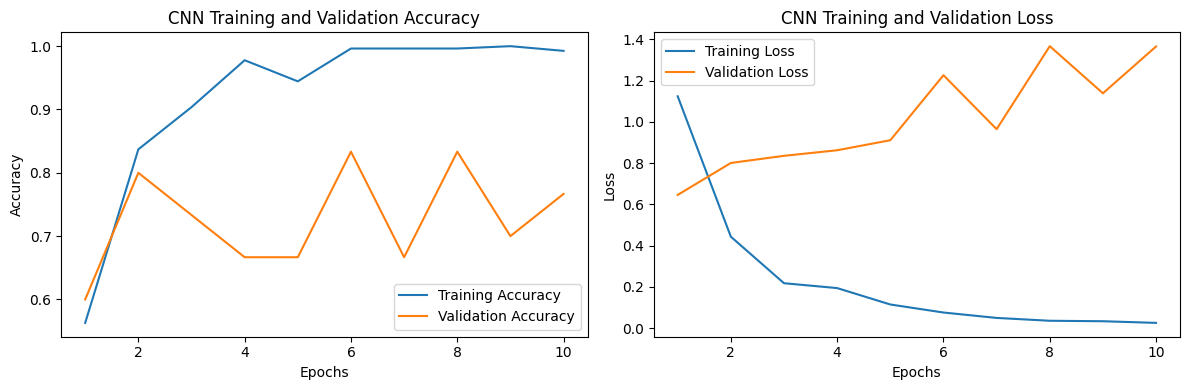

In [37]:
# Create the plots for CNN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), cnn_train_accuracy, label='Training Accuracy')
plt.plot(range(1, 11), cnn_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), cnn_train_loss, label='Training Loss')
plt.plot(range(1, 11), cnn_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# Make predictions using CNN
cnn_y_pred = mod_network.predict(X_test_subset)
cnn_y_pred = np.round(cnn_y_pred, 0)

# Evaluate CNN
cnn_accuracy = accuracy_score(y_test_subset, cnn_y_pred)
cnn_precision = precision_score(y_test_subset, cnn_y_pred)
cnn_recall = recall_score(y_test_subset, cnn_y_pred)
cnn_f1 = f1_score(y_test_subset, cnn_y_pred)

print("CNN - Accuracy:", cnn_accuracy, " Precision:", cnn_precision,
      " Recall:", cnn_recall, " F1-Score:", cnn_f1)

4/4 [==============================] - 0s 25ms/step
CNN - Accuracy: 0.81  Precision: 0.8279569892473119  Recall: 0.9625  F1-Score: 0.8901734104046244


In [39]:
cm= confusion_matrix(y_test_subset,cnn_y_pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[ 4 16]
 [ 3 77]]


# Autoencoder with ML

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
auto_mod = Sequential()
auto_mod.add(Dense(128, activation='relu', input_shape=(32000, 15)))
auto_mod.add(Dense(64, activation='relu'))
auto_mod.add(Dense(32, activation='relu'))
auto_mod.add(Dense(64, activation='relu'))
auto_mod.add(Dense(128, activation='relu'))
auto_mod.add(Dense(15, activation='sigmoid'))

In [42]:
auto_mod.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder using X_train data
history=auto_mod.fit(X_train_subset, X_train_subset, epochs=10, batch_size=32)

Epoch 1/10
10/10 [==============================] - 3s 66ms/step - loss: 0.2747
Epoch 2/10
10/10 [==============================] - 1s 64ms/step - loss: 0.2207
Epoch 3/10
10/10 [==============================] - 1s 64ms/step - loss: 0.1048
Epoch 4/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0388
Epoch 5/10
10/10 [==============================] - 1s 66ms/step - loss: 0.0352
Epoch 6/10
10/10 [==============================] - 1s 60ms/step - loss: 0.0352
Epoch 7/10
10/10 [==============================] - 1s 62ms/step - loss: 0.0352
Epoch 8/10
10/10 [==============================] - 1s 62ms/step - loss: 0.0352
Epoch 9/10
10/10 [==============================] - 1s 62ms/step - loss: 0.0352
Epoch 10/10
10/10 [==============================] - 1s 61ms/step - loss: 0.0352


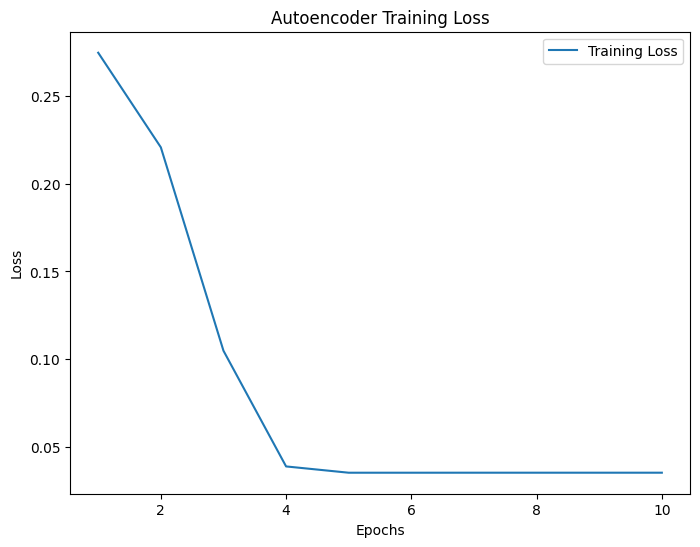

In [43]:
autoencoder_train_loss = history.history['loss']

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), autoencoder_train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()


In [44]:
# Extract features using the autoencoder
X_train_features = auto_mod.predict(X_train_subset)
X_test_features = auto_mod.predict(X_test_subset)

4/4 [==============================] - 0s 27ms/step


In [45]:
X_train_features_reshaped = X_train_features.reshape(X_train_features.shape[0], -1)


In [46]:
CLF = RandomForestClassifier(random_state=42, class_weight=class_weights)
CLF.fit(X_train_features_reshaped, y_train_subset)

RandomForestClassifier(class_weight={0: 2.55232558, 1: 0.62181303},
                       random_state=42)

In [47]:
X_test_features_reshaped = X_test_features.reshape(X_test_features.shape[0], -1)

In [48]:
rf_predictions = CLF.predict(X_test_features_reshaped)

In [49]:
# Evaluate the classifiers
rf_accuracy = accuracy_score(y_test_subset, rf_predictions)
rf_precision = precision_score(y_test_subset, rf_predictions)
rf_recall = recall_score(y_test_subset, rf_predictions)
rf_f1 = f1_score(y_test_subset, rf_predictions)

In [50]:
print("Random Forest - Accuracy:", rf_accuracy, " Precision:",
      rf_precision, " Recall:", rf_recall, " F1-Score:", rf_f1)


Random Forest - Accuracy: 0.82  Precision: 0.8163265306122449  Recall: 1.0  F1-Score: 0.898876404494382


In [51]:
cm= confusion_matrix(y_test_subset,rf_predictions)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[ 2 18]
 [ 0 80]]


# Tunning the random forest

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# Define the hyperparameters to tune
hparams = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Create the Random Forest classifier
CLF = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(CLF, hparams, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_features_reshaped, y_train_subset)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [55]:
# Get the best hyperparameters and refit the model
best_params = grid_search.best_params_
best_CLF = grid_search.best_estimator_
best_CLF.fit(X_train_features_reshaped, y_train_subset)

# Make predictions using the best model
best_rf_predictions = best_CLF.predict(X_test_features_reshaped)

# Evaluate the best model
best_rf_accuracy = accuracy_score(y_test_subset, best_rf_predictions)
best_rf_precision = precision_score(y_test_subset, best_rf_predictions)
best_rf_recall = recall_score(y_test_subset, best_rf_predictions)
best_rf_f1 = f1_score(y_test_subset, best_rf_predictions)

In [56]:

print("Best Random Forest Model - Accuracy:", best_rf_accuracy, " Precision:",
      best_rf_precision, " Recall:", best_rf_recall, " F1-Score:", best_rf_f1)

best_cm = confusion_matrix(y_test_subset, best_rf_predictions)
print("Best Confusion Matrix \n", best_cm)


Best Random Forest Model - Accuracy: 0.8  Precision: 0.8061224489795918  Recall: 0.9875  F1-Score: 0.8876404494382023
Best Confusion Matrix 
 [[ 1 19]
 [ 1 79]]


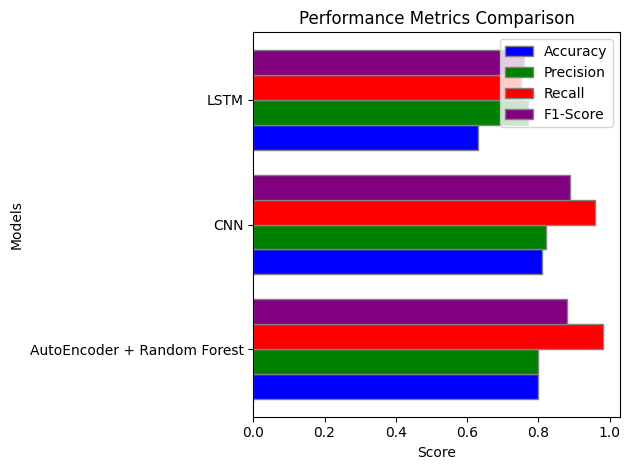

In [1]:
import matplotlib.pyplot as plt

# Data for the models and their performance metrics
models = ['AutoEncoder + Random Forest', 'CNN', 'LSTM']
accuracy = [ 0.8, 0.81,  0.63]
precision = [ 0.8, 0.82,  0.77]
recall = [ 0.98, 0.96,  0.75]
f1_score = [ 0.88, 0.89, 0.76]

# Set the height of the bars
bar_height = 0.2

# Set the positions of the bars on the y-axis
r1 = range(len(models))
r2 = [y + bar_height for y in r1]
r3 = [y + bar_height for y in r2]
r4 = [y + bar_height for y in r3]

# Create the horizontal bar graph
plt.barh(r1, accuracy, color='b', height=bar_height, edgecolor='grey', label='Accuracy')
plt.barh(r2, precision, color='g', height=bar_height, edgecolor='grey', label='Precision')
plt.barh(r3, recall, color='r', height=bar_height, edgecolor='grey', label='Recall')
plt.barh(r4, f1_score, color='purple', height=bar_height, edgecolor='grey', label='F1-Score')

# Add labels and title
plt.xlabel('Score')
plt.yticks([r + bar_height*1.5 for r in range(len(models))], models)
plt.ylabel('Models')
plt.title('Performance Metrics Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
